In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
cd '/content/drive/MyDrive/nn/Practical-Data-Science-with-Python-main/Chapter4/test_your_knowledge'

/content/drive/MyDrive/nn/Practical-Data-Science-with-Python-main/Chapter4/test_your_knowledge


In [7]:
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.impute import KNNImputer

In [8]:
df1 = pd.read_excel('solar_data_1.xlsx', engine = 'openpyxl')
df2 = pd.read_excel('solar_data_2.xlsx', engine = 'openpyxl')
df = pd.concat([df1,df2], axis= 0)
df.head()

,state_name,number_of_panels_total,kw_total,kw_median,yearly_sunlight_kwh_median,yearly_sunlight_kwh_total,existing_installs_count
0,NaN,31,7.75,3.25,5209.464685,1.243764e+04,0.0
1,Alabama,58997532,14749383.00,9.75,12069.322656,1.896138e+10,549.0
2,Alaska,2179124,544781.00,7.25,6540.612622,4.664927e+08,83.0
3,Arizona,114697808,28674452.00,11.75,18974.796637,4.639329e+10,39553.0
4,Arkansas,28130196,7032549.00,9.75,12099.947974,8.941609e+09,238.0


In [10]:
df.describe()

,number_of_panels_total,kw_total,kw_median,yearly_sunlight_kwh_median,yearly_sunlight_kwh_total,existing_installs_count
count,5.500000e+01,5.500000e+01,54.000000,54.000000,5.500000e+01,54.000000
mean,6.418217e+07,1.604554e+07,7.907407,9952.438422,2.078188e+10,12785.666667
std,9.028737e+07,2.257184e+07,1.963882,3390.644848,3.233178e+10,46522.857045
min,3.100000e+01,7.750000e+00,3.250000,5156.452783,1.243764e+04,0.000000
25%,1.704436e+07,4.261089e+06,6.750000,7350.628174,5.982309e+09,357.000000
50%,4.847139e+07,1.211785e+07,7.750000,9409.792603,1.481478e+10,1727.000000
75%,7.325589e+07,1.831397e+07,9.000000,11375.480533,2.074348e+10,5994.500000
max,5.310227e+08,1.327557e+08,13.000000,19004.649878,1.980163e+11,328899.000000


Start with some EDA

In [11]:
# it's small data
df.shape

(55, 7)

In [12]:
# we have a few missing values
# the datatypes look to be correct
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 55 entries, 0 to 33
Data columns (total 7 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   state_name                  54 non-null     object 
 1   number_of_panels_total      55 non-null     int64  
 2   kw_total                    55 non-null     float64
 3   kw_median                   54 non-null     float64
 4   yearly_sunlight_kwh_median  54 non-null     float64
 5   yearly_sunlight_kwh_total   55 non-null     float64
 6   existing_installs_count     54 non-null     float64
dtypes: float64(5), int64(1), object(1)
memory usage: 3.4+ KB


In [14]:
df['state_name'].unique().shape
df['state_name'].unique()

(52,)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f8cae0bf290>,
      dtype=object)

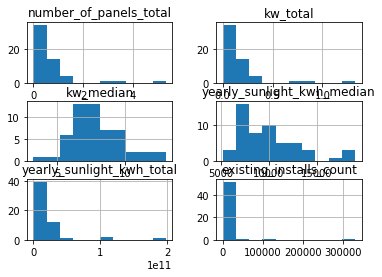

In [15]:
df.hist()

In [16]:
df.corr()

,number_of_panels_total,kw_total,kw_median,yearly_sunlight_kwh_median,yearly_sunlight_kwh_total,existing_installs_count
number_of_panels_total,1.000000,1.000000,0.300934,0.307517,0.995182,0.813889
kw_total,1.000000,1.000000,0.300934,0.307517,0.995182,0.813889
kw_median,0.300934,0.300934,1.000000,0.938811,0.326023,0.269857
yearly_sunlight_kwh_median,0.307517,0.307517,0.938811,1.000000,0.348925,0.326591
yearly_sunlight_kwh_total,0.995182,0.995182,0.326023,0.348925,1.000000,0.853207
existing_installs_count,0.813889,0.813889,0.269857,0.326591,0.853207,1.000000


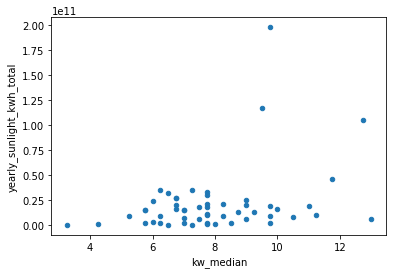

In [23]:
df.plot.scatter(x='kw_median', y='yearly_sunlight_kwh_total')

In [24]:
df[df['existing_installs_count'] > 50000]

,state_name,number_of_panels_total,kw_total,kw_median,yearly_sunlight_kwh_median,yearly_sunlight_kwh_total,existing_installs_count
5,California,531022657,1.327557e+08,9.75,14460.077979,1.980163e+11,328899.0
10,Florida,305682374,7.642059e+07,12.75,17250.183057,1.050627e+11,104123.0


This makes sens, CA and FL are very solar-friendly in terms of policy, I believe.

In [29]:
df.sort_values(by='kw_total')

,state_name,number_of_panels_total,kw_total,kw_median,yearly_sunlight_kwh_median,yearly_sunlight_kwh_total,existing_installs_count
0,NaN,31,7.750000e+00,3.25,5209.464685,1.243764e+04,0.0
25,Vermont,1517792,3.794480e+05,6.50,7115.722705,4.203384e+08,131.0
8,Delaware,1985389,4.963472e+05,8.00,9746.691431,6.068660e+08,90.0
2,Alaska,2179124,5.447810e+05,7.25,6540.612622,4.664927e+08,83.0
9,District of Columbia,3096860,7.742150e+05,4.25,5156.452783,9.449727e+08,443.0
30,Wyoming,3249883,8.124708e+05,7.75,10645.344800,1.108615e+09,29.0
21,South Dakota,5162611,1.290653e+06,7.75,9741.482898,1.610011e+09,21.0
20,Maine,6252716,1.563179e+06,5.75,6562.470239,1.792813e+09,360.0
28,West Virginia,6414155,1.603539e+06,7.00,8128.741748,1.857681e+09,80.0
9,New Hampshire,7241937,1.810484e+06,6.25,6963.208612,2.056881e+09,262.0


In [28]:
df.duplicated().sum()

3

In [30]:
# looks like we have some duplicated states in there, we should drop those
# keep=False means it marks all duplicates as True, so shows all duplicated rows
df[df.duplicated(keep=False)]

,state_name,number_of_panels_total,kw_total,kw_median,yearly_sunlight_kwh_median,yearly_sunlight_kwh_total,existing_installs_count
1,Massachusetts,52098838,13024709.50,5.75,6571.621021,1.486191e+10,15331.0
2,Michigan,96360897,24090224.25,6.75,7350.628174,2.695720e+10,1727.0
3,Minnesota,51738380,12934595.00,7.00,7896.430273,1.481478e+10,1519.0
31,Massachusetts,52098838,13024709.50,5.75,6571.621021,1.486191e+10,15331.0
32,Michigan,96360897,24090224.25,6.75,7350.628174,2.695720e+10,1727.0
33,Minnesota,51738380,12934595.00,7.00,7896.430273,1.481478e+10,1519.0


In [31]:
df.drop_duplicates(inplace=True)

In [32]:
df.shape

(52, 7)

In [35]:
# let's fill the missing values now
imputer = KNNImputer(n_neighbors=10)
state_names = df[['state_name']]  # indexing a single column with a list keeps it as a DataFrame instead of a Series
numeric_df = df.drop('state_name', axis=1)
imputed = imputer.fit_transform(numeric_df)
numeric_df[numeric_df.columns] = imputed
df = pd.concat([state_names, numeric_df], axis=1)

In [36]:
# looks like we successfully filled the missing values
df.isna().sum()

state_name                    1
number_of_panels_total        0
kw_total                      0
kw_median                     0
yearly_sunlight_kwh_median    0
yearly_sunlight_kwh_total     0
existing_installs_count       0
dtype: int64

In [37]:
df.to_excel('cleaned_solar_data.xlsx', index=False)

Summary:

The data is very small, with each US state, DC, and one unknown location having data. Most of the data is left-skewed with some large outliers. A few large outliers are CA and FL, which have a lot of installed solar panels.
We also see some strong correlations between certain columns of data. For example, the yearly kW total, number of panels, and existing installs count were strongly correcated, the kWh and kW median columns were weakly correlated to everything else. Some duplicates were detected in the data and were removed, and some missing values filled in with KNN imputation. Then the data was saved to an Excel file for further use.

In [ ]:
pd.read_excel()
pd.concat([])
df.head()
df.info()
df.describe()
df.corr()
df.hist()
df.drop()
df.drop_duplicates()
df.dropna()
df.to_excel()
df.isna()
df.plot()